In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv("StudentsPerformance.csv")

In [129]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [130]:
df.shape   #  1000 rows and 8 columns

(1000, 8)

In [131]:
df.duplicated().sum()  # no duplicate values[no role play of duplicates in M.l it doesn't affect accuracy of model]

0

In [132]:
df.isnull().sum()  # there are no null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [133]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [134]:
df.dtypes   # only 3 columns contains numerical data

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [135]:
df.nunique()  # it gives number of unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [137]:
df.describe()  # we can get descriptive summary of data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Students scoring Minimum scores of 0,7,10 in maths,reading,writing respectively
### Students scoring Maximum scores of 100,100,100 in maths,reading,writing respectively
### mean of score for all section varies from 66 to 69.16
### std. deviation varies from 14.6 to 15.19



In [138]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [139]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [140]:
df["total_marks"] = df["math score"]+df["reading score"]+df["writing score"]
df["average_marks"] = df["total_marks"]/3

In [141]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [142]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total_marks                      int64
average_marks                  float64
dtype: object

In [143]:
# seperate categorical and numerical features

In [144]:
categorical_features = df[df.columns[df.dtypes == object]]

In [145]:
numerical_features = df[df.columns[df.dtypes != object]]

In [146]:
categorical_features

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [147]:
df["gender"].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [148]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [149]:
df["parental level of education"].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [150]:
df["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [151]:
df["test preparation course"].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [152]:
numerical_features

,math score,reading score,writing score,total_marks,average_marks
0,72,72,74,218,72.666667
1,69,90,88,247,82.333333
2,90,95,93,278,92.666667
3,47,57,44,148,49.333333
4,76,78,75,229,76.333333
...,...,...,...,...,...
995,88,99,95,282,94.000000
996,62,55,55,172,57.333333
997,59,71,65,195,65.000000
998,68,78,77,223,74.333333


In [153]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [154]:
# visualization

<Axes: xlabel='average_marks', ylabel='Count'>

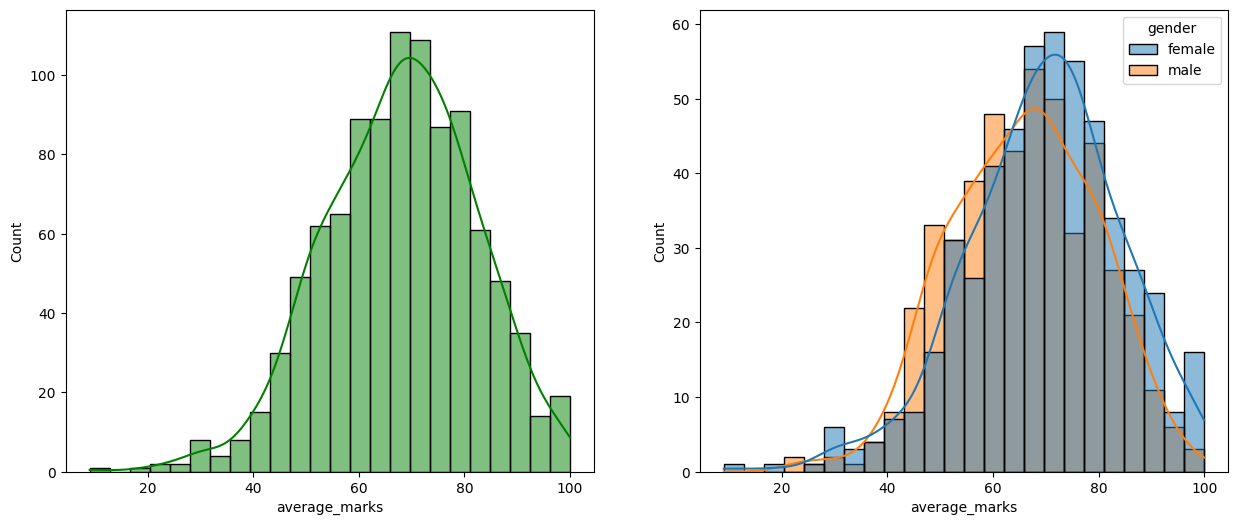

In [155]:
plt.subplots(1,2,figsize = (15,6))  # plt.subplots help to make plots(1,2) means 1 row 2 column/plots
plt.subplot(121)                    # plt.subplot(121) - (it reppresents 1 row 2 column 1 plot)
sns.histplot(data = df,x= "average_marks",kde=True,color= "g")  # kde - smoothning curve
plt.subplot(122)
sns.histplot(data = df,x = "average_marks",kde = True,hue = "gender")  # hue - represents different categories with diffrent colour

# Average marks of female is higher than avg. marks of male

<Axes: xlabel='average_marks', ylabel='Count'>

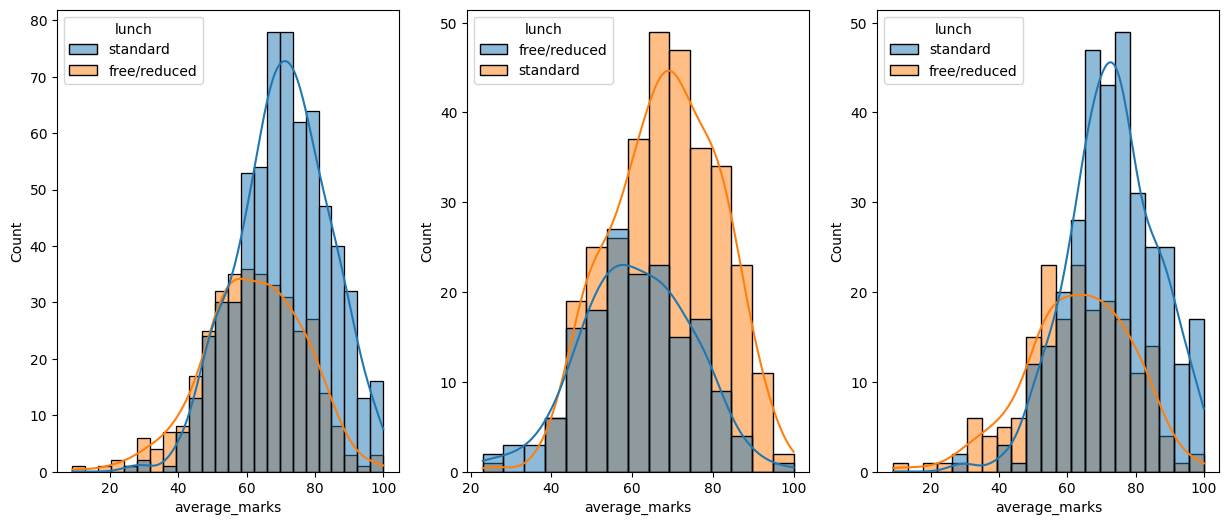

In [156]:
plt.subplots(1,3,figsize = (15,6))
plt.subplot(131)
sns.histplot(data = df,x = "average_marks",kde = True,hue = "lunch")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"],x = "average_marks",kde = True,hue = "lunch")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"],x = "average_marks",kde = True,hue = "lunch")

# standard lunch help student(both male and female) to perform well in exam  

<Axes: xlabel='average_marks', ylabel='Count'>

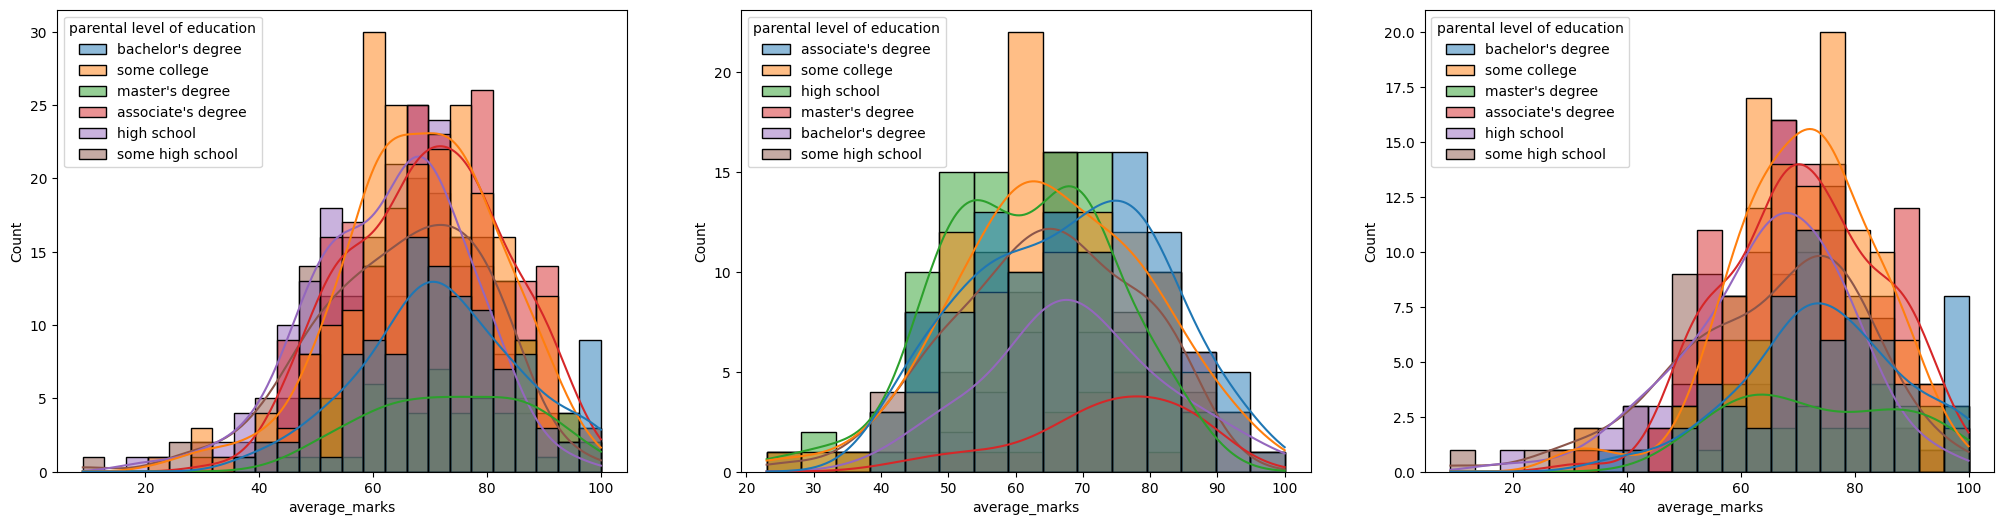

In [157]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df,x= "average_marks",kde = True,hue = "parental level of education")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"],x= "average_marks",kde = True,hue = "parental level of education")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"],x= "average_marks",kde = True,hue = "parental level of education")

# 1.In general, parent education level doesn't make any impact on student performance in exam
# 2.In case of male students,those students whose parent education level is master's degree or associate degree tends to perform in exam well
# 3.In case of female students , parent education level doesn't make any impact on student performance in exam

<Axes: xlabel='average_marks', ylabel='Count'>

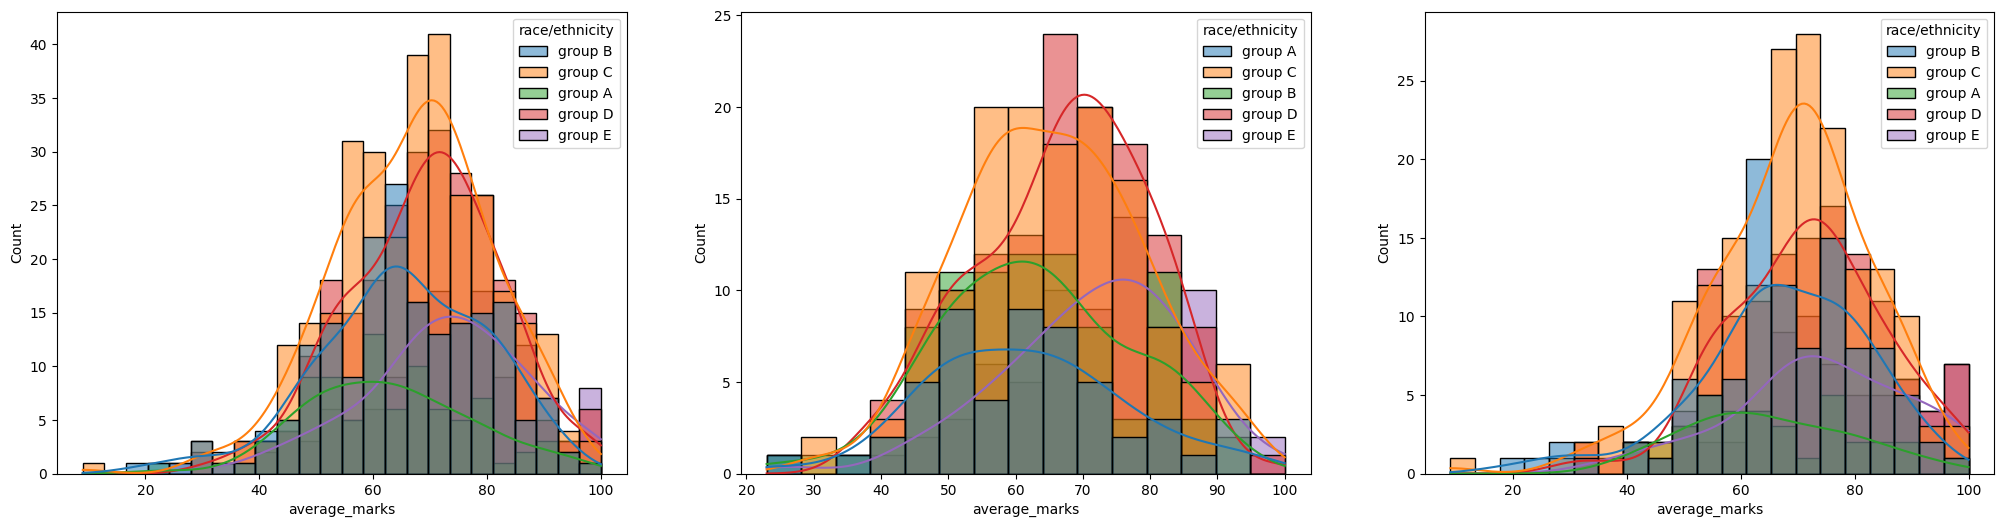

In [158]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df,x= "average_marks",kde = True,hue = "race/ethnicity")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"],x= "average_marks",kde = True,hue = "race/ethnicity")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"],x= "average_marks",kde = True,hue = "race/ethnicity")

# Students(both Male and Female) from Group A and Group B doesn't perform well in exam

<Axes: xlabel='average_marks', ylabel='Count'>

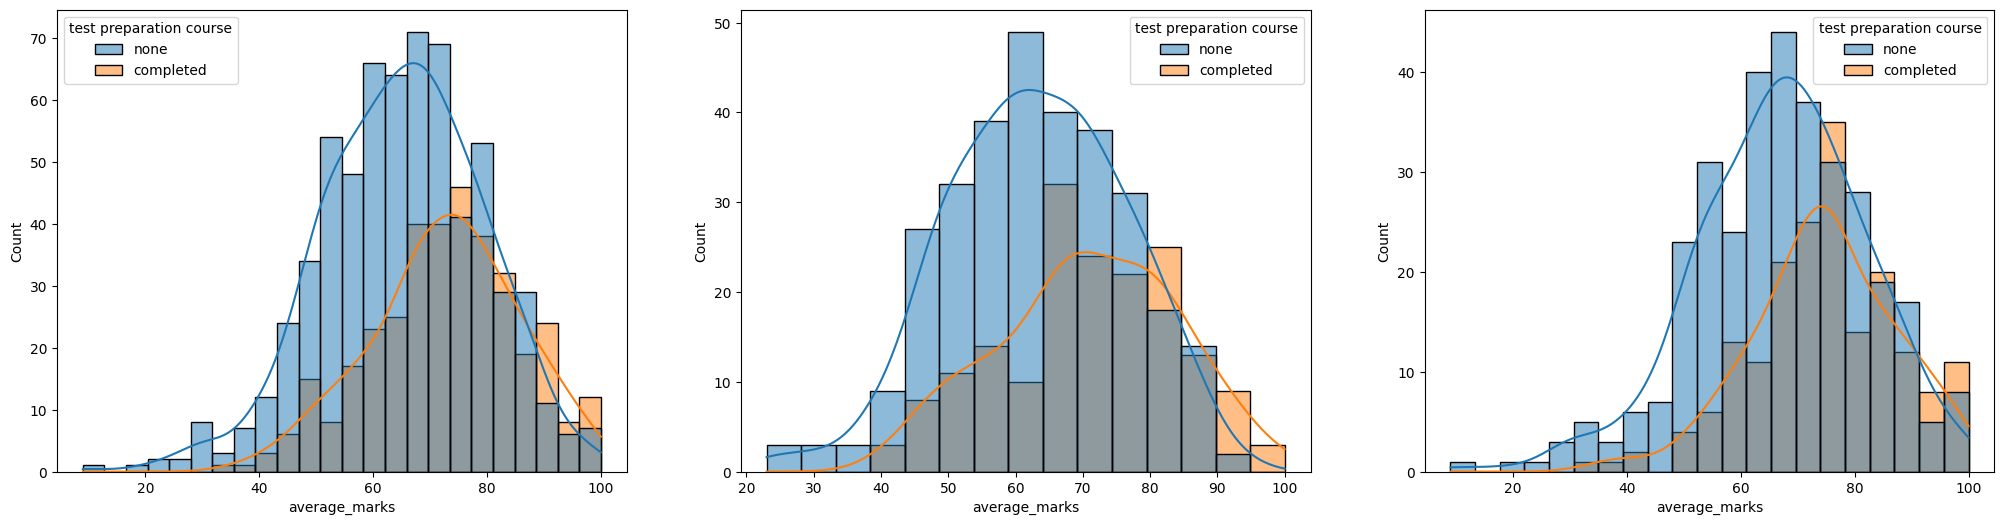

In [159]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df,x= "average_marks",kde = True,hue = "test preparation course")
plt.subplot(132)
sns.histplot(data = df[df["gender"] == "male"],x= "average_marks",kde = True,hue = "test preparation course")
plt.subplot(133)
sns.histplot(data = df[df["gender"] == "female"],x= "average_marks",kde = True,hue = "test preparation course")

# Students(Both Male and Female) who have completed their course performed well in exam 

<Axes: >

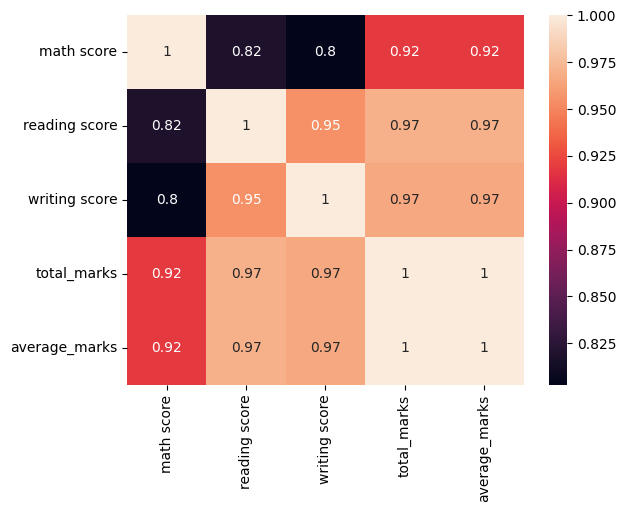

In [160]:
sns.heatmap(numerical_features.corr(),annot = True) (# positive correlation)